# Decomposition/Factorization

Why is it useful to express something as a few parts multiplied together?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

x = np.random.uniform(0.1,5,100)
noise = np.random.normal(scale=0.3, size=x.size)

In [2]:
# at what points does y=0?
#y = -x**3 + 7*x**2 - 14*x + 8
y = (4-x) * (2-x) * (1-x)

<AxesSubplot:xlabel='x', ylabel='y'>

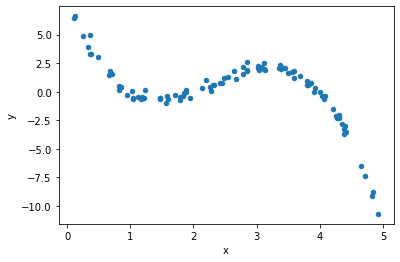

In [3]:
pd.DataFrame({"x": x, "y": y+noise}).plot.scatter(x="x", y="y")

# Matrix Multiplication

In [4]:
A = np.random.normal(size=(11, 7))
B = np.random.normal(size=(7, 14))
C = np.random.normal(size=(14, 3))
D = np.random.normal(size=(3, 25))

print(A.shape, B.shape, C.shape, D.shape)
print((A @ B @ C @ D).shape)
A @ B @ C @ D

(11, 7) (7, 14) (14, 3) (3, 25)
(11, 25)


array([[-2.66185621e+01, -1.36474898e+01,  1.05343623e+01,
        -1.83575918e+01, -2.19409127e+01, -3.37059652e+00,
        -9.91876286e+00,  1.98361034e+01,  1.08249433e+01,
        -1.69479331e+01,  1.26053983e+01, -3.21876649e+01,
        -1.24765864e+01, -2.76462098e+00,  2.60007199e+01,
        -2.50457116e+01,  1.56765519e+01,  1.44460261e+01,
         1.13014979e+01,  1.88441575e+01,  3.26654618e+01,
         4.19051120e+01,  3.54060020e+00,  8.87597087e-01,
         4.00265555e+01],
       [ 5.55301556e+00,  1.31032027e+01, -1.67991449e+01,
        -6.28694506e+00,  1.81608753e+01,  2.84328637e+01,
         1.69944868e-01, -5.74236451e+01, -1.91214008e+01,
         8.34644754e+00, -3.33509787e+01,  3.87197489e+01,
        -7.52428337e+00,  2.91876761e+01, -2.16377654e+01,
         1.37626881e+01, -4.16787534e+01,  2.54289867e+01,
         1.03225706e+01,  7.43424200e-01, -3.04091783e+01,
        -3.70314627e+01, -1.78780661e+00,  8.78033947e+00,
        -3.25808841e+01],
    

# Decomposition with PCA 

In [5]:
df = pd.DataFrame(make_blobs(centers=3, random_state=320)[0], columns=["A", "B"])
df["C"] = df["A"] * 2
df["D"] = df["A"] - df["B"]
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [6]:
p = PCA()

W = p.fit_transform(df)
C = p.components_

# roughly:
# df = W @ C

In [7]:
print(df.shape)
print(W.shape, C.shape)

(100, 4)
(100, 4) (4, 4)


In [8]:
pd.DataFrame(W @ C + p.mean_).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [9]:
# what is cool about PCA?
# the first columns of W are most important
# and the first rows of C are most important

In [10]:
print(W[:, :2].shape, C[:2, :].shape)

(100, 2) (2, 4)


In [11]:
pd.DataFrame(W[:, :2] @ C[:2, :] + p.mean_).head()

,0,1,2,3
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [12]:
p.explained_variance_ratio_.round(2)

array([0.77, 0.23, 0.  , 0.  ])

In [13]:
pd.DataFrame(W[:, :1] @ C[:1, :] + p.mean_).head()

,0,1,2,3
0,4.415707,-0.880229,8.831414,5.295936
1,1.903025,0.090383,3.806050,1.812642
2,10.036329,-3.051394,20.072658,13.087723
3,5.011442,-1.110353,10.022883,6.121795
4,5.832180,-1.427392,11.664360,7.259572


# Explained Variance

In [14]:
a = np.array([.9, 2.1, 3])
a.var()

0.7400000000000001

In [15]:
b = np.array([1, 2, 3])
(a-b).var()

0.0066666666666666706

In [16]:
df.values.reshape(-1).var()

42.542575093552266

Text(0, 0.5, 'Explained Variance')

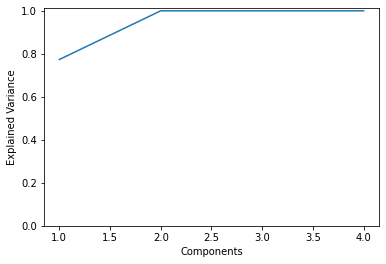

In [17]:
ax = pd.Series(p.explained_variance_ratio_.cumsum(),
               index=range(1, 5)).plot.line(ylim=0)
ax.set_xlabel("Components")
ax.set_ylabel("Explained Variance")

# Feature Dimensionality Reduction

In [44]:
p = PCA(0.8) # choose however many components needed to get to 80% explained variance

W = p.fit_transform(df)
C = p.components_

print(df.shape)
print(W.shape, C.shape)

(100, 4)
(100, 2) (2, 4)


In [31]:
df.head()

,A,B,C,D
0,5.181126,1.877452,10.362252,3.303674
1,2.519682,2.312099,5.039364,0.207583
2,10.116633,-2.762072,20.233266,12.878705
3,5.895889,2.076169,11.791779,3.819721
4,4.796110,-5.160183,9.592221,9.956293


In [32]:
pd.DataFrame(C).head()

,0,1,2,3
0,0.376062,-0.145267,0.752124,0.521329
1,-0.200986,-0.724122,-0.401973,0.523135


In [21]:
pd.DataFrame(W).head()

,0,1
0,-4.424802,-3.808312
1,-11.106364,-3.068153
2,10.521197,-0.399549
3,-2.840662,-4.400534
4,-0.658207,5.154923


In [22]:
-4.424802 * C[0] + -3.808312 * C[1] + p.mean_

array([ 5.18112571,  1.87745153, 10.36225143,  3.30367418])

<AxesSubplot:xlabel='0', ylabel='1'>

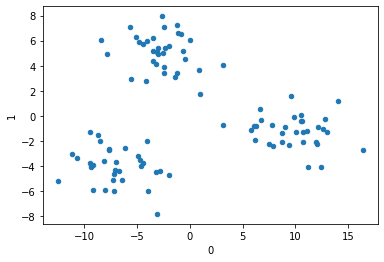

In [36]:
pd.DataFrame(W).plot.scatter(x=0, y=1)

In [45]:
p = Pipeline([
   ("pca", PCA(0.95)), 
   ("km", KMeans(3)),
])
p.fit_predict(df)

array([0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0,
       1, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2], dtype=int32)

# Lossy Compression

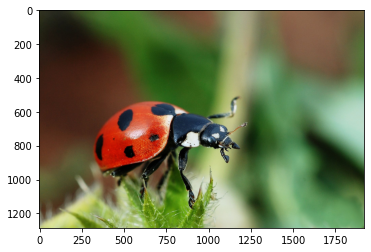

In [46]:
img = plt.imread("bug.jpg")
plt.imshow(img)

In [47]:
img.shape

(1286, 1920, 3)

(1286, 1920)


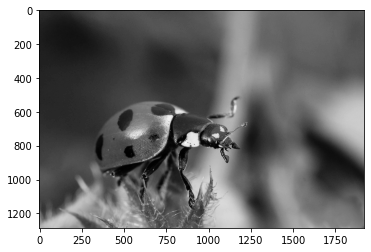

In [51]:
img2 = img.mean(axis=2)
print(img2.shape)
plt.imshow(img2, cmap="gray")

In [72]:
p = PCA(0.98) # however many components necessary to explain 98% of the original image
W = p.fit_transform(img2)
C = p.components_
print(img2.shape)
print(W.shape, C.shape) # 1286 by 10 (for W), 10 by 1920 (for C)

(1286, 1920)
(1286, 103) (103, 1920)


In [73]:
img3 = W @ C + p.mean_
img3.shape

(1286, 1920)

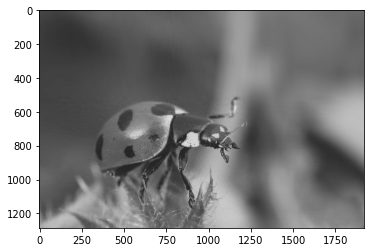

In [74]:
plt.imshow(img3, cmap="gray")

In [75]:
C.shape

(103, 1920)

In [76]:
p.explained_variance_ratio_.sum()

0.9800641089084889

In [77]:
before_count = len(img2.reshape(-1))
before_count

2469120

In [78]:
after_count = len(W.reshape(-1)) + len(C.reshape(-1)) + len(p.mean_.reshape(-1))
after_count

332138

In [79]:
compression_ratio = before_count / after_count
compression_ratio

7.434018389946347